In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import abs

In [56]:
df = pd.read_csv("emissions_data.csv")

# Shape = 750 Rows and 12 Columns 

df


,Manufacturer,Model Year,Regulatory Class,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,All,1975,All,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,All,1976,All,14.22136,13.18117,15.73946,625.02238,674.34147,564.74348,4079.198,135.0839,-
2,All,1977,All,15.06743,14.00580,16.60587,589.99880,634.71366,535.34732,3981.818,135.9847,-
3,All,1978,All,15.83777,14.68193,17.52390,561.62442,605.82637,507.59981,3715.238,129.0248,-
4,All,1979,All,15.91271,14.87711,17.39245,559.69495,598.63764,512.09833,3655.465,123.5922,-
...,...,...,...,...,...,...,...,...,...,...,...,...
745,VW,2020,All,24.91724,21.42046,28.41676,354.08929,411.91414,310.46703,4144.084,240.9033,48.08672
746,VW,2021,All,24.72024,21.46116,27.91861,352.49487,406.89859,311.45347,4394.182,269.1716,49.55366
747,VW,2022,All,26.05278,22.54068,29.52298,332.61247,385.64771,292.60343,4302.086,260.9631,48.61317
748,VW,2023,All,27.04400,23.53261,30.47434,316.58742,365.89496,279.39051,4361.105,263.4194,48.80510


In [62]:
df = df.dropna(subset = ["Manufacturer" , "Model Year" , "Regulatory Class" , 
                         "Real-World MPG" , "Real-World MPG_City" , "Real-World MPG_Hwy" , 
                         "Real-World CO2 (g/mi)" , "Real-World CO2_City (g/mi)" , "Real-World CO2_Hwy (g/mi)" ,
                         "Weight (lbs)" , "Horsepower (HP)" , "Footprint (sq. ft.)"])

df["Model Year"] = df["Model Year"].replace("Prelim. 2024" , "2024")

df['Model Year'] = df['Model Year'].astype(int)

df["Real-World CO2 (g/mi)"] = df["Real-World CO2 (g/mi)"].replace("-", pd.NA)


df["Real-World CO2 (g/mi)"] = df["Real-World CO2 (g/mi)"].astype(float)

# print(df.to_string())
# print(df["Real-World CO2 (g/mi)"].to_string())

df

,Manufacturer,Model Year,Regulatory Class,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,All,1975,All,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,All,1976,All,14.22136,13.18117,15.73946,625.02238,674.34147,564.74348,4079.198,135.0839,-
2,All,1977,All,15.06743,14.00580,16.60587,589.99880,634.71366,535.34732,3981.818,135.9847,-
3,All,1978,All,15.83777,14.68193,17.52390,561.62442,605.82637,507.59981,3715.238,129.0248,-
4,All,1979,All,15.91271,14.87711,17.39245,559.69495,598.63764,512.09833,3655.465,123.5922,-
...,...,...,...,...,...,...,...,...,...,...,...,...
745,VW,2020,All,24.91724,21.42046,28.41676,354.08929,411.91414,310.46703,4144.084,240.9033,48.08672
746,VW,2021,All,24.72024,21.46116,27.91861,352.49487,406.89859,311.45347,4394.182,269.1716,49.55366
747,VW,2022,All,26.05278,22.54068,29.52298,332.61247,385.64771,292.60343,4302.086,260.9631,48.61317
748,VW,2023,All,27.04400,23.53261,30.47434,316.58742,365.89496,279.39051,4361.105,263.4194,48.80510


In [ ]:
average_emissions = df.groupby(["Model Year" , "Manufacturer" ])["Real-World CO2 (g/mi)"].mean().reset_index()

average_emissions["Real-World CO2 (g/mi) AVERAGE "] = average_emissions["Real-World CO2 (g/mi)"]

average_emissions = average_emissions.drop("Real-World CO2 (g/mi)", axis =1)

print(average_emissions.to_string())

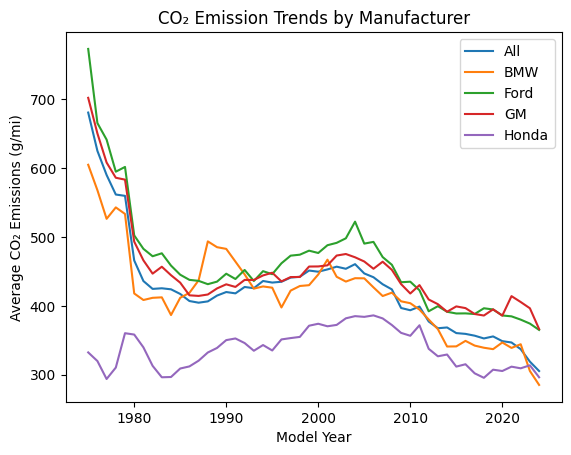

In [74]:
top_makers = average_emissions["Manufacturer"].value_counts().head(5).index

for x in top_makers:
    sub = average_emissions[average_emissions["Manufacturer"] == x]
    plt.plot(sub["Model Year"] , sub["Real-World CO2 (g/mi) AVERAGE "] , label = x)
    
    
plt.title('CO₂ Emission Trends by Manufacturer')
plt.xlabel('Model Year')
plt.ylabel('Average CO₂ Emissions (g/mi)')
plt.legend()
plt.show()

### Trend Insights

Between the years 1980 and 2020, there is a decline in vehicle emissions from the top 4 car manufacturers. There is also a decline in emissions from car manufacturers across the board indicated by the blue line.

The steep decrease is prominent between the years 1980 and 1990, however that trend starts to increase during the turn of the new millennia. However, one decade later these trends start to drop again.

One interesting insight to draw from this chart is that the car manufacturer giant Honda had noticeably low emissions throughout the past several decades. This can be a result of their incredibly reliable and efficient engines, or their focus on manufacturing smaller commuter vehicles, or a combination of both.   

To summarize, major automakers such as Ford and GM showed steady reductions in CO₂ emissions, aligning with EPA GHG targets. Outlier years highlight potential compliance risk windows or failure to meet compliance altogether.

In [99]:
# Determining high-emission outliers 

df = df[(df["Manufacturer"] != "All") & (df["Manufacturer"] != "Tesla")]


median = df["Real-World CO2 (g/mi)"].median()
mad = abs(df['Real-World CO2 (g/mi)'] - median).median()

df['Outlier'] = abs(df['Real-World CO2 (g/mi)'] - median) / mad > 3
non_compliant = df[df['Outlier']]

print(non_compliant[['Manufacturer', 'Model Year', 'Real-World CO2 (g/mi)']].head())

# df["Outlier"].head(50)


   Manufacturer  Model Year  Real-World CO2 (g/mi)
50          BMW        1975              604.81785
51          BMW        1976              567.96151
52          BMW        1977              526.35416
53          BMW        1978              542.93584
54          BMW        1979              533.44500


/var/folders/fq/gd0bm0k94rl2460v_bvfh5f80000gn/T/ipykernel_28044/3716939626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlier'] = abs(df['Real-World CO2 (g/mi)'] - median) / mad > 3


In [101]:
# Non-Compliance Report 

non_compliant.to_csv('Non-Compliant Emissions Outlier Report.csv', index=False)


### Non Compliant Years and Model

Detected 27 high-emission outlier models exceeding 3× the median CO₂ baseline, potentially requiring additional review for compliance. However, all of these models with non-compliant emissions were manufactured in the years between 1975 and 1979, with one exception of a Ford model in 2004.

These findings were generated into a CSV report named "Non-Compliant Emissions Outlier Report". 